In [3]:
from google.colab import files
uploaded_files = files.upload()

Saving bank_dataset.csv to bank_dataset.csv


Since the data here was in the form of a string data and as single column head. Therefore, we need to convert it to a proper dataframe using pandas library.

In [15]:
import csv
import numpy as np
import pandas as pd
# Define column names based on the given data
columns = ["age", "job", "marital", "education", "default", "balance", "housing","loan", "contact", "day", "month", "duration", "campaign", "pdays","previous", "poutcome", "y"]
# Read the data into a pandas DataFrame
df = pd.read_csv('bank_dataset.csv', sep=';', header=None, names=columns)

# Display the first few rows of the DataFrame to verify the data
print(data.head())

df

   age         job  marital  education  default  balance  housing  loan  \
0  age         job  marital  education  default  balance  housing  loan   
1   30  unemployed  married    primary       no     1787       no    no   
2   33    services  married  secondary       no     4789      yes   yes   
3   35  management   single   tertiary       no     1350      yes    no   
4   30  management  married   tertiary       no     1476      yes   yes   

    contact  day  month  duration  campaign  pdays  previous  poutcome   y  
0   contact  day  month  duration  campaign  pdays  previous  poutcome   y  
1  cellular   19    oct        79         1     -1         0   unknown  no  
2  cellular   11    may       220         1    339         4   failure  no  
3  cellular   16    apr       185         1    330         1   failure  no  
4   unknown    3    jun       199         4     -1         0   unknown  no  


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4517,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4518,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4519,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4520,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4522 entries, 0 to 4521
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4522 non-null   object
 1   job        4522 non-null   object
 2   marital    4522 non-null   object
 3   education  4522 non-null   object
 4   default    4522 non-null   object
 5   balance    4522 non-null   object
 6   housing    4522 non-null   object
 7   loan       4522 non-null   object
 8   contact    4522 non-null   object
 9   day        4522 non-null   object
 10  month      4522 non-null   object
 11  duration   4522 non-null   object
 12  campaign   4522 non-null   object
 13  pdays      4522 non-null   object
 14  previous   4522 non-null   object
 15  poutcome   4522 non-null   object
 16  y          4522 non-null   object
dtypes: object(17)
memory usage: 600.7+ KB


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables.
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

X = df.drop(columns=['y'])
y = df['y']

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier.
clf = DecisionTreeClassifier()

# Train the classifier.
clf.fit(X_train, y_train)

# Make predictions on the test set.
predictions = clf.predict(X_test)

# Evaluate the model (for example, with accuracy).
accuracy = clf.score(X_test, y_test)
print(f"Accuracy of the Decision Tree Classifier: {accuracy}")


Accuracy of the Decision Tree Classifier: 0.8287292817679558


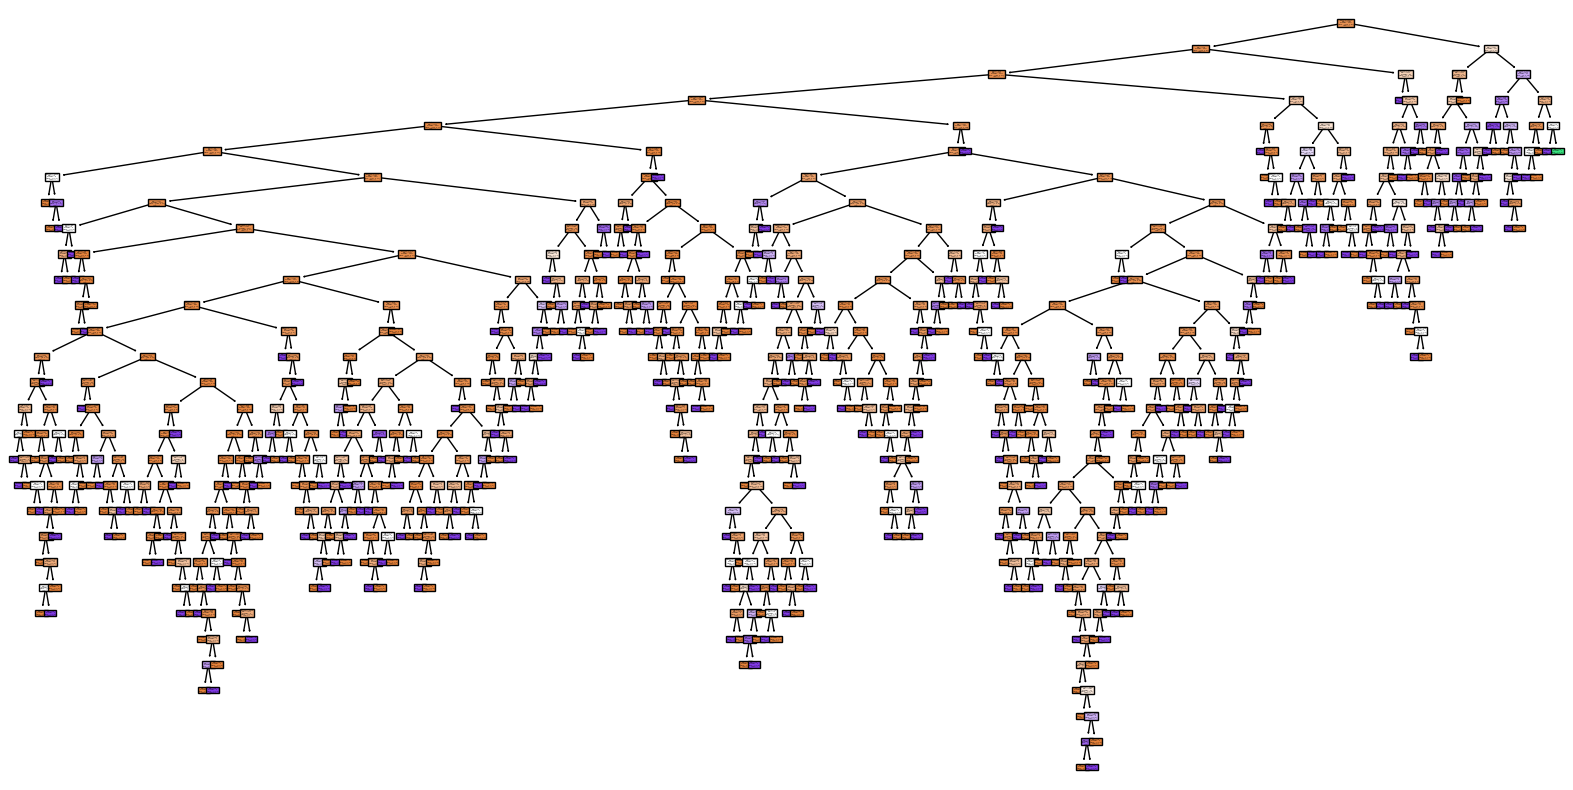

In [20]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming 'clf' is your trained DecisionTreeClassifier
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_.astype(str))
plt.show()


In [27]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the data into a pandas DataFrame
# Replace 'url' with your actual CSV URL or file path
data = df
# Encode categorical variables if needed
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Define features and target variable
X = data.drop(columns=['y'])  # Features
y = data['y']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
predictions = clf.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, predictions)
print("\nClassification Report:")
print(class_report)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

Confusion Matrix:
[[707  78]
 [ 80  40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       785
           2       0.34      0.33      0.34       120

    accuracy                           0.83       905
   macro avg       0.62      0.62      0.62       905
weighted avg       0.82      0.83      0.82       905

Accuracy: 0.83
